### Prep

In [1]:
import pandas as pd
import os
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #"last_expr" #all for debugging better

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [ ]:
data_path = 


In [2]:
os.getcwd()
os.chdir('D:\\jasper\\98_general_projects\\03_UFC_Predictions\\Data\\2020-11-27_scraped_data/') # TODO: in config auslagern
os.chdir('D:/jasper/98_general_projects/03_UFC_Predictions/Data/2020-11-27_scraped_data/') # TODO: in config auslagern

'D:\\jasper\\98_general_projects\\03_UFC_Predictions'

In [3]:
# test = pd.read_csv('2020-02-24_Fighters_List.csv',index_col = 0)
# test['Last_First'] = [i[:1] for i in test.Last]
# test.Last_First.value_counts() #SMCP

In [73]:
date = '2020-09-24' # date of scraped data
y_back = 20 # reverse time limit?
next_date = 'Dec. 12, 2020' # next fight night date 

### Start from matches, fighters and profiles

In [6]:
m = pd.read_csv(f"{date}_Matches_List.csv")
f = pd.read_csv(f"{date}_Fighters_List.csv")
p = pd.read_csv(f"{date}_Profiles_List.csv")
n = pd.read_csv(f"{date}_Plan_List.csv")
try:
    f.drop('Unnamed: 0',axis=1,inplace=True)
    p.drop('Unnamed: 0',axis=1,inplace=True)
except: pass

In [19]:
m.head(2)
f.head(2)
p.head(2)
n.head(2)

p.FID.nunique()
m.loc[m.MID=='b46f2f007b622bce',:]
m.MID.value_counts()

,MID,FID,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2
0,9be14b958737f074,0,L,Strikeforce - Henderson vs. Babalu,"Dec. 04, 2010",U-DEC,3,5:00,LIGHTWEIGHT BOUT,3 Rnd (5-5-5),NaN,Jerry Griffin 28 - 29. Jackson Harper 28 - 29....,Tom Aaron,Matt Ricehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bcb38a9d29822d3d,0,W,Strikeforce - Heavy Artillery,"May. 15, 2010",SUB,1,0:56,CATCH WEIGHT BOUT,3 Rnd (5-5-5),Al Wichgers,Guillotine Choke,Tom Aaron,Eric Steenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
0,0,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0
1,1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0


,FID,HT,WT,Reach,Stance,DOB
0,0,--,155 lbs.,--,STANCE:,"Jul 13, 1978"
1,1,"5' 11""",155 lbs.,--,Orthodox,"Jul 03, 1983"


,FID,Fighter_1,Fighter_2
0,14,Israel Adesanya,Paulo Costa
1,46,Holly Holm,Irene Aldana


3557

,MID,FID,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2
58,b46f2f007b622bce,14,W,UFC 248: Adesanya vs. Romero,"Mar. 07, 2020",U-DEC,5,5:00,UFC MIDDLEWEIGHT TITLE BOUT,5 Rnd (5-5-5-5-5),Dan Miragliotta,Ron McCarthy 48 - 47. Sal D'amato 48 - 47. Chr...,Israel Adesanya,Yoel Romero,0.0,0.0,48.0,132.0,40.0,89.0,48.0,132.0,40.0,89.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,81.0,20.0,58.0,9.0,22.0,7.0,13.0,25.0,29.0,13.0,18.0,48.0,132.0,35.0,82.0,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0
11838,b46f2f007b622bce,2720,W,UFC 248: Adesanya vs. Romero,"Mar. 07, 2020",U-DEC,5,5:00,UFC MIDDLEWEIGHT TITLE BOUT,5 Rnd (5-5-5-5-5),Dan Miragliotta,Ron McCarthy 48 - 47. Sal D'amato 48 - 47. Chr...,Israel Adesanya,Yoel Romero,0.0,0.0,48.0,132.0,40.0,89.0,48.0,132.0,40.0,89.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,81.0,20.0,58.0,9.0,22.0,7.0,13.0,25.0,29.0,13.0,18.0,48.0,132.0,35.0,82.0,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0


4b202bae6c87b98b    2
2a7cf1a89de3709e    2
7cdb56b2f207a41b    2
2df42cebdd1062b4    2
c5bef3da17e595ee    2
381cee4b3af63ade    2
5cce3bc28ddb158f    2
1bd1a710c2c042ad    2
51696044aafb2037    2
5db23cc876db1619    2
c5e0e4ee11903076    2
968cd768ac41e6ee    2
241a722f3b042c59    2
346875f19aefc88d    2
b42d4c3c701945bf    2
188537d906b30a7c    2
7072a324a82c4297    2
b0ed7f6450ad33c5    2
ad9ecef413a5b48f    2
6c7b8a2e2716957e    2
f377d703092b1ab2    2
7c76c752c7abf2e0    2
d9c0351cd21e40e0    2
2e8217f029c25a3a    2
07c00213ec388e07    2
a7d42315236560e9    2
573d3a6984cbcd29    2
589fd70f6f8b747c    2
319b09306094259b    2
f8ad660497e49187    2
92cde4c4f5ff3bbc    2
c2ddadfa1a1056be    2
6e2254b4fd39ce40    2
e3b5f66198161226    2
d3e37d1c95a5f382    2
e15b393a27c07043    2
88b1d4f951070f83    2
a255ed658a2ac9bb    2
68a3f26b424269fc    2
c89017008da245be    2
5d72fa4562b13f7b    2
af7c42764ab050ea    2
0d698108c5f5d1d6    2
f0d4652f8edfbe6d    2
bda97d9a44a89d52    2
37c7325548

In [25]:
m.loc[m.MID=='557ed8c426e7c3fc',:]
m.loc[m.FID==1740,:]

f.loc[f.FID == 3347,:]

f.loc[f.Last == 'Lawler',:]

,MID,FID,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2
14798,557ed8c426e7c3fc,3347,W,PRIDE 32: The Real Deal,"Oct. 21, 2006",KO/TKO,1,0:22,MIDDLEWEIGHT BOUT,3 Rnd (5-5-5),Yuji Shimada,Flying KneeHead,Robbie Lawler,Joey Villasenor,1.0,0.0,3.0,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0


,MID,FID,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2
7562,864cddd6e165ea2d,1740,L,UFC Fight Night: Smith vs. Rakic,"Aug. 29, 2020",U-DEC,3,5:00,WELTERWEIGHT BOUT,3 Rnd (5-5-5),Jason Herzog,Ron McCarthy 27 - 30. Derek Cleary 27 - 30. Mi...,Robbie Lawler,Neil Magny,0.0,0.0,26.0,45.0,62.0,88.0,41.0,62.0,116.0,144.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0,3.0,1.0,0.0,18.0,36.0,36.0,61.0,4.0,5.0,21.0,22.0,4.0,4.0,5.0,5.0,15.0,33.0,39.0,63.0,6.0,6.0,16.0,18.0,5.0,6.0,7.0,7.0
7563,e139628170777bef,1740,W,UFC Fight Night: Covington vs. Lawler,"Aug. 03, 2019",U-DEC,5,5:00,WELTERWEIGHT BOUT,5 Rnd (5-5-5-5-5),Keith Peterson,Dominic Carolei 50 - 45. Dave Tirelli 50 - 45....,Colby Covington,Robbie Lawler,0.0,0.0,179.0,515.0,78.0,167.0,201.0,541.0,82.0,171.0,10.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,454.0,61.0,144.0,20.0,28.0,10.0,16.0,31.0,33.0,7.0,7.0,154.0,477.0,66.0,152.0,25.0,38.0,12.0,15.0,0.0,0.0,0.0,0.0
7564,97dabff880f33202,1740,L,UFC 235: Jones vs. Smith,"Mar. 02, 2019",SUB,1,3:20,WELTERWEIGHT BOUT,3 Rnd (5-5-5),Herb Dean,Other - Choke On Ground Bulldog Choke,Robbie Lawler,Ben Askren,0.0,0.0,26.0,29.0,0.0,1.0,30.0,33.0,3.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,21.0,24.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,9.0,9.0,0.0,0.0,16.0,18.0,0.0,0.0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3347,3347,Joey,Villasenor,Smokin' Joe,"6' 0""",185 lbs.,--,Orthodox,29,10,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1740,1740,Robbie,Lawler,Ruthless,"5' 11""",170 lbs.,"74.0""",Southpaw,28,15,0


In [526]:
# m.shape
# m = m[m.FID != 3084]
# m.shape

(15193, 58)

(15186, 58)

In [527]:

# f = f[f.FID != 3084]

In [531]:
# n[n.FID == 3364]

In [47]:
# name = 'Quinton Jackson'
# m.loc[m.Fighter_1 == name,:].sort_values('MID')
# m.loc[m.Fighter_2 == name,:]

# f[f.FID == 1460]
# # f[f.Last=='Feijao']


In [48]:
# # ATTENTION MANUAL CORRECTION OF NAMES REQUIRED DUE TO MISTAKES ON UFC STATS PAGE

# def fanual_correct(first_old,first_new, second):
#     f.loc[(f.First == first_old)&(f.Last == second),'First'] = first_new


# fanual_correct('Rogerio','Minotauro','Nogueira')

# def manual_correct(name_old,name_new):
#     m.loc[m.Fighter_1 == name_old,'Fighter_1'] = name_new
#     m.loc[m.Fighter_2 == name_old,'Fighter_2'] = name_new
#     n.loc[n.Fighter_1 == name_old,'Fighter_1'] = name_new
#     n.loc[n.Fighter_2 == name_old,'Fighter_2'] = name_new
    

# manual_correct('Ronaldo Souza','Jacare Souza')
# manual_correct('Rafael Cavalcante','Rafael Feijao')
# manual_correct('Michael Chandler','Mike Chandler')
# manual_correct('Mirko Filipovic','Mirko Cro Cop')
# manual_correct('Quinton Jackson','Rampage Jackson')
# manual_correct('Cristiane Justino','Cris Cyborg')
# manual_correct('Antonio Rodrigo Nogueira','Minotauro Nogueira')
# manual_correct('Rogerio Nogueira','Minotauro Nogueira')
# manual_correct('Antonio Rogerio Nogueira','Minotauro Nogueira')
# manual_correct('Antonio Rodrigo Nogueira','Minotauro Nogueira')

In [49]:
# f['FID'] = [i for i in f.index]
# p['FID'] = [i for i in p.index]

In [69]:
n = pd.read_csv(f"{date}_Plan_List.csv")

In [70]:
n = n[n.duplicated(['Fighter_1'],keep=False)] # delete fights if only one fighter was scraped, e.g., new fighter
n = n.sort_values('Fighter_1') # TODO: check why not keep FID -> better keep

In [54]:
# only QS
f[f.Last.str.startswith('T')].shape#.iloc[-15:]
for le in list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    f[f.Last.str.startswith(le)].iloc[0:3]

(129, 11)

,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
0,0,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0
1,1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,2,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
173,173,Niklas,Backstrom,NaN,"6' 1""",145 lbs.,--,Orthodox,11,3,0
174,174,Seth,Baczynski,The Polish Pistola,"6' 3""",170 lbs.,"75.0""",Orthodox,20,14,0
175,175,Ryan,Bader,Darth,"6' 2""",205 lbs.,"74.0""",Orthodox,23,5,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
427,427,Yan,Cabral,NaN,"5' 11""",155 lbs.,"73.0""",Orthodox,13,3,0
428,428,Alvin,Cacdac,NaN,"5' 6""",125 lbs.,--,Orthodox,18,13,0
429,429,Alex,Caceres,Bruce Leeroy,"5' 10""",145 lbs.,"73.0""",Southpaw,17,12,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
671,671,Sarah,D'alelio,The Monster,"5' 7""",145 lbs.,--,NaN,11,7,0
674,674,Alex,Da Silva,Leko,"5' 8""",155 lbs.,"73.0""",Orthodox,21,2,0
675,675,Henrique,Da Silva Lopes,Montanha,"6' 3""",240 lbs.,--,NaN,5,2,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
837,837,Ben,Earwood,NaN,"5' 8""",170 lbs.,--,Orthodox,12,3,0
838,838,Cody,East,The Freight Train,"6' 3""",245 lbs.,--,Orthodox,12,3,0
839,839,Marvin,Eastman,The Beastman,"5' 9""",185 lbs.,"73.0""",Orthodox,18,15,1


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
914,914,Edward,Faaloloto,NaN,--,155 lbs.,"70.0""",NaN,2,5,0
915,915,Urijah,Faber,The California Kid,"5' 6""",135 lbs.,"67.0""",Orthodox,35,11,0
916,916,Melinda,Fabian,NaN,"5' 6""",125 lbs.,"66.0""",NaN,4,4,2


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1025,1025,James,Gabert,NaN,--,178 lbs.,--,NaN,6,4,0
1026,1026,Gustavo,Gabriel,NaN,"5' 6""",125 lbs.,--,Orthodox,13,1,0
1027,1027,Claudia,Gadelha,Claudinha,"5' 4""",115 lbs.,"63.0""",Orthodox,18,4,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1225,1225,Chelsea,Hackett,Hammer,"5' 8""",125 lbs.,--,NaN,3,0,1
1226,1226,Keith,Hackney,The Giant Killer,"5' 11""",200 lbs.,--,Sideways,2,2,0
1227,1227,Steve,Hadsel,NaN,"5' 8""",170 lbs.,--,NaN,3,0,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1414,1414,Al,Iaquinta,Raging,"5' 10""",155 lbs.,"70.0""",Orthodox,14,6,1
1415,1415,Khadis,Ibragimov,NaN,"6' 3""",205 lbs.,"78.0""",Orthodox,8,3,0
1416,1416,Minoki,Ichihara,NaN,"5' 7""",178 lbs.,--,Orthodox,0,1,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1457,1457,Yves,Jabouin,Tiger,"5' 7""",135 lbs.,"68.0""",Orthodox,20,11,0
1458,1458,Kevin,Jackson,NaN,"5' 10""",199 lbs.,--,Switch,4,2,0
1459,1459,Eugene,Jackson,The Wolf,"5' 8""",185 lbs.,--,Orthodox,15,9,1


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1564,1564,Patrick,Kaase,Kamikaze,"5' 9""",185 lbs.,--,NaN,1,2,0
1565,1565,Emily,Kagan,NaN,"5' 3""",115 lbs.,--,NaN,3,3,0
1566,1566,Oron,Kahlon,NaN,"5' 8""",145 lbs.,--,NaN,12,0,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1702,1702,Achmed,Labasanov,NaN,"6' 3""",215 lbs.,--,Orthodox,7,4,0
1703,1703,Josh,LaBerge,NaN,"5' 10""",145 lbs.,--,NaN,11,6,0
1704,1704,Jeremiah,Labiano,The Kid,"5' 10""",135 lbs.,--,NaN,11,5,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
1868,1868,Dong Hyun,Ma,Maestro,"5' 11""",155 lbs.,"70.0""",Orthodox,16,11,3
1869,1869,William,Macario,Patolino,"5' 11""",170 lbs.,"75.0""",Orthodox,9,3,0
1870,1870,Jason,MacDonald,The Athlete,"6' 3""",185 lbs.,"80.0""",Orthodox,25,16,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
2228,2228,Katsuhiko,Nagata,NaN,"5' 7""",154 lbs.,--,Southpaw,6,7,3
2229,2229,Yuji,Nagata,NaN,"6' 0""",225 lbs.,--,Orthodox,0,2,0
2230,2230,Greg,Nagy,NaN,"6' 1""",210 lbs.,--,Orthodox,1,3,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
2325,2325,Jake,O'Brien,Irish,"6' 3""",205 lbs.,"76.0""",Orthodox,15,4,0
2326,2326,TJ,O'Brien,The Spider,"6' 2""",155 lbs.,--,Orthodox,20,8,0
2327,2327,Sean,O'Connell,The Real OC,"6' 1""",205 lbs.,"74.0""",Orthodox,17,9,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
2390,2390,Raquel,Pa'aluhi,Rocky,"5' 7""",135 lbs.,--,NaN,6,5,0
2391,2391,Nick,Pace,NaN,"5' 7""",135 lbs.,"68.0""",Orthodox,8,3,0
2392,2392,Larissa,Pacheco,NaN,"5' 7""",135 lbs.,--,Orthodox,10,2,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
2567,2567,Bao,Quach,NaN,"5' 3""",145 lbs.,--,Orthodox,19,10,1
2568,2568,Gary,Quan,NaN,"5' 8""",143 lbs.,--,NaN,3,5,0
2569,2569,Billy,Quarantillo,NaN,"5' 10""",145 lbs.,"70.0""",Orthodox,15,2,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
2576,2576,Benji,Radach,Razor,"5' 10""",185 lbs.,--,Orthodox,21,7,0
2577,2577,Jordan,Radev,NaN,"5' 7""",185 lbs.,--,Southpaw,23,5,0
2578,2578,Gilbert,Rael,NaN,"5' 8""",155 lbs.,--,NaN,1,3,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
2760,2760,Yusup,Saadulaev,Maestro,"5' 6""",135 lbs.,--,NaN,16,4,1
2761,2761,Pete,Sabala,NaN,--,135 lbs.,--,NaN,3,15,0
2762,2762,Amir,Sadollah,NaN,"5' 10""",170 lbs.,"75.0""",Orthodox,6,5,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3140,3140,Osamu,Tachihikari,NaN,"6' 5""",300 lbs.,--,Orthodox,0,4,0
3141,3141,Amber,Tackett,NaN,--,115 lbs.,--,NaN,1,3,0
3142,3142,Eugenio,Tadeu,NaN,"5' 8""",160 lbs.,--,Orthodox,2,3,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3269,3269,Alberto,Uda,NaN,"6' 3""",185 lbs.,--,Orthodox,12,2,0
3270,3270,Ryuki,Ueyama,NaN,"5' 11""",180 lbs.,--,Southpaw,12,18,5
3271,3271,Christian,Uflacker,NaN,"5' 11""",170 lbs.,--,NaN,5,0,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3285,3285,Richie,Vaculik,Vas,"5' 6""",125 lbs.,"69.0""",Orthodox,10,4,0
3286,3286,Egidijus,Valavicius,NaN,"6' 0""",200 lbs.,--,Orthodox,29,12,0
3287,3287,Charlie,Valencia,NaN,"5' 3""",135 lbs.,"64.0""",Orthodox,12,7,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3361,3361,James,Wade,NaN,"5' 10""",205 lbs.,--,NaN,4,11,0
3362,3362,Chris,Wade,NaN,"5' 10""",155 lbs.,"70.0""",Orthodox,12,3,0
3363,3363,Neil,Wain,Old School,"5' 10""",242 lbs.,--,Orthodox,13,4,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3481,3481,Rubens,Xavier,Macula,"6' 3""",220 lbs.,--,Orthodox,5,3,0


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3482,3482,Song,Yadong,NaN,"5' 8""",145 lbs.,"67.0""",Orthodox,16,4,1
3483,3483,Jamie,Yager,The Chosyn 1,"6' 1""",185 lbs.,--,Orthodox,8,4,0
3484,3484,Eddie,Yagin,The Filipino Phenom,"5' 7""",145 lbs.,--,Orthodox,16,7,1


,FID,First,Last,Nick,HT,WT,Reach,Stance,W,L,D
3527,3527,Luke,Zachrich,NaN,"6' 2""",185 lbs.,"74.0""",Orthodox,14,4,0
3528,3528,Anton,Zafir,The Professor,"5' 11""",170 lbs.,--,Orthodox,7,3,0
3529,3529,Aiemann,Zahabi,NaN,"5' 8""",135 lbs.,"68.0""",Orthodox,7,2,0


**MANUAL ADD OF DATE FOR NEXT REQUIRED**

In [71]:
n = n[n.Fighter_1 != 'Error']
n = n.reset_index(drop = True)

,FID,Fighter_1,Fighter_2
0,3268,Ben Rothwell,Marcin Tybura
1,2737,Ben Rothwell,Marcin Tybura
2,674,Brad Riddell,Alex Da Silva
3,2647,Brad Riddell,Alex Da Silva
4,2369,Brian Ortega,Chan Sung Jung
5,1558,Brian Ortega,Chan Sung Jung
6,656,Charles Jourdain,Josh Culibao
7,1550,Charles Jourdain,Josh Culibao
8,3218,Dequan Townsend,Dusko Todorovic
9,3236,Dequan Townsend,Dusko Todorovic


In [74]:
n['MID'] = ['next_' + f'{i + (i+1)%2:03d}' for i in n.index]
n['Date'] = next_date

In [76]:
r = pd.merge(m,n, how = 'outer')

In [84]:
n.head()

,FID,Fighter_1,Fighter_2,MID,Date
0,3268,Ben Rothwell,Marcin Tybura,next_001,"Dec. 12, 2020"
1,2737,Ben Rothwell,Marcin Tybura,next_001,"Dec. 12, 2020"
2,674,Brad Riddell,Alex Da Silva,next_003,"Dec. 12, 2020"
3,2647,Brad Riddell,Alex Da Silva,next_003,"Dec. 12, 2020"
4,2369,Brian Ortega,Chan Sung Jung,next_005,"Dec. 12, 2020"


In [89]:
r = pd.merge(r, f, on = 'FID') 

In [90]:
r = pd.merge(r, p.loc[:,['DOB','FID']]) # only add DOB

In [94]:
r.head(2)

,MID,FID,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2,First,Last,Nick,HT,WT,Reach,Stance,W,L,D,DOB
0,9be14b958737f074,0,L,Strikeforce - Henderson vs. Babalu,"Dec. 04, 2010",U-DEC,3.0,5:00,LIGHTWEIGHT BOUT,3 Rnd (5-5-5),NaN,Jerry Griffin 28 - 29. Jackson Harper 28 - 29....,Tom Aaron,Matt Ricehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0,"Jul 13, 1978"
1,bcb38a9d29822d3d,0,W,Strikeforce - Heavy Artillery,"May. 15, 2010",SUB,1.0,0:56,CATCH WEIGHT BOUT,3 Rnd (5-5-5),Al Wichgers,Guillotine Choke,Tom Aaron,Eric Steenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0,"Jul 13, 1978"


In [102]:
assert m.MID.value_counts().sum() == m.shape[0]

In [100]:
assert r.shape[0] == m.shape[0]+n.shape[0]

In [101]:
assert r[r.MID.str.startswith('next')].shape[0] == n.shape[0]

##### Start actual preprocessing

In [103]:
r.insert(2, 'Result', r['Result_F1'].replace({'W': 1, 'L': 0, 'NC':0.5,'D':0.5}), allow_duplicates=True) 

In [104]:
liste = list(r.columns[-11:])+['FID']

In [105]:
liste

['First',
 'Last',
 'Nick',
 'HT',
 'WT',
 'Reach',
 'Stance',
 'W',
 'L',
 'D',
 'DOB',
 'FID']

In [106]:
for column in liste:
    r[column+'_F1'] = ''
for column in liste:
    r[column+'_F2'] = ''

In [107]:
for col in liste:
    r[col+'_F1'] = [r[col][i] if r.Fighter_1[i] == str(r.First[i]) + ' ' +str(r.Last[i]) else None for i in r.index]
    r[col+'_F2'] = [r[col][i] if r.Fighter_2[i] == str(r.First[i]) + ' ' +str(r.Last[i]) else None for i in r.index]

In [109]:
# CHECK FOR INVALID NAMES HERE
r.FID_F2.isna().sum()
assert r[(r.FID_F2.isna())&(r.FID_F1.isna())].loc[:,['Fighter_1','Fighter_2','First','Last','Nick']].shape[0] == 0
assert r[(r.FID_F2.isna())&(r.FID_F1.isna())].shape[0] == 0

7801

In [112]:
r.sort_values('MID',inplace = True)
r.set_index('MID',inplace=True)
r.drop_duplicates(inplace = True)
r.reset_index(inplace=True)

In [113]:
s1 = r.drop_duplicates('MID',keep='first').set_index('MID')
s2 = r.drop_duplicates('MID',keep='last').set_index('MID')

In [114]:
r[r.MID == '9a5267dac72a3a21'] # only one row as values from second fighter are not available

r[r.MID == '9a1206b4e9413a74']  # for comparison

,MID,FID,Result,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2,First,Last,Nick,HT,WT,Reach,Stance,W,L,D,DOB,First_F1,Last_F1,Nick_F1,HT_F1,WT_F1,Reach_F1,Stance_F1,W_F1,L_F1,D_F1,DOB_F1,FID_F1,First_F2,Last_F2,Nick_F2,HT_F2,WT_F2,Reach_F2,Stance_F2,W_F2,L_F2,D_F2,DOB_F2,FID_F2
9528,9a5267dac72a3a21,1593,1.0,W,Yarrenoka! - New Year's Eve 2007,"Dec. 31, 2007",U-DEC,2.0,5:00,LIGHTWEIGHT BOUT,2 Rnd (10-5),Yuji Shimada,DETAILS:,Tatsuya Kawajiri,Luiz Azeredo,0.0,0.0,65.0,129.0,9.0,15.0,197.0,299.0,23.0,35.0,3.0,8.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,62.0,125.0,4.0,10.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,1.0,5.0,10.0,4.0,6.0,1.0,1.0,3.0,6.0,59.0,118.0,2.0,3.0,Tatsuya,Kawajiri,Crusher,"5' 7""",145 lbs.,"69.0""",Orthodox,36,11,2,"May 08, 1978",Tatsuya,Kawajiri,Crusher,"5' 7""",145 lbs.,"69.0""",Orthodox,36.0,11.0,2.0,"May 08, 1978",1593.0,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN
9529,9a5267dac72a3a21,170,1.0,W,Yarrenoka! - New Year's Eve 2007,"Dec. 31, 2007",U-DEC,2.0,5:00,LIGHTWEIGHT BOUT,2 Rnd (10-5),Yuji Shimada,DETAILS:,Tatsuya Kawajiri,Luiz Azeredo,0.0,0.0,65.0,129.0,9.0,15.0,197.0,299.0,23.0,35.0,3.0,8.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,62.0,125.0,4.0,10.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,1.0,5.0,10.0,4.0,6.0,1.0,1.0,3.0,6.0,59.0,118.0,2.0,3.0,Luiz,Azeredo,NaN,"5' 9""",154 lbs.,--,Orthodox,15,10,0,"Jun 10, 1976",None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,Luiz,Azeredo,NaN,"5' 9""",154 lbs.,--,Orthodox,15.0,10.0,0.0,"Jun 10, 1976",170.0


,MID,FID,Result,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2,First,Last,Nick,HT,WT,Reach,Stance,W,L,D,DOB,First_F1,Last_F1,Nick_F1,HT_F1,WT_F1,Reach_F1,Stance_F1,W_F1,L_F1,D_F1,DOB_F1,FID_F1,First_F2,Last_F2,Nick_F2,HT_F2,WT_F2,Reach_F2,Stance_F2,W_F2,L_F2,D_F2,DOB_F2,FID_F2
9510,9a1206b4e9413a74,978,0.0,L,Strikeforce Challengers 18,"Aug. 12, 2011",SUB,1.0,4:49,LIGHTWEIGHT BOUT,3 Rnd (5-5-5),Chris Tognoni,D'Arce Choke,Sterling Ford,Milton Vieira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sterling,Ford,NaN,"5' 10""",155 lbs.,--,NaN,15,7,0,"Mar 12, 1986",Sterling,Ford,NaN,"5' 10""",155 lbs.,--,NaN,15.0,7.0,0.0,"Mar 12, 1986",978.0,None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN
9511,9a1206b4e9413a74,3335,0.0,L,Strikeforce Challengers 18,"Aug. 12, 2011",SUB,1.0,4:49,LIGHTWEIGHT BOUT,3 Rnd (5-5-5),Chris Tognoni,D'Arce Choke,Sterling Ford,Milton Vieira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milton,Vieira,Miltinho,"6' 0""",145 lbs.,--,Orthodox,13,8,2,"Oct 04, 1978",None,None,None,None,None,None,None,NaN,NaN,NaN,None,NaN,Milton,Vieira,Miltinho,"6' 0""",145 lbs.,--,Orthodox,13.0,8.0,2.0,"Oct 04, 1978",3335.0


In [116]:
r.MID.value_counts().value_counts()

2    7770
1      79
Name: MID, dtype: int64

In [117]:
r = s1.combine_first(s2) # TODO: maybe throw away fighter were only one match side was available

In [125]:
r.sort_values('MID',inplace = True)

In [128]:
del s1
del s2

In [129]:
r.drop(['FID','First','Last','Nick','HT','WT','Reach','Stance','W','L','D','DOB'],axis = 1, inplace = True)

In [130]:
r.Date = pd.to_datetime(r.Date, infer_datetime_format=True)

In [131]:
r.loc[r.DOB_F1 == '--','DOB_F1'] = None
r.loc[r.DOB_F2 == '--','DOB_F2'] = None

In [132]:
r['DOB_F1'] = pd.to_datetime(r.DOB_F1, infer_datetime_format=True)
r['DOB_F2'] = pd.to_datetime(r.DOB_F2, infer_datetime_format=True)

In [133]:
r['HT_cm_F1'] = [(int(r.HT_F1.loc[i].split("'")[0])*12+int(r.HT_F1.loc[i].split("'")[1].replace('"','').replace(' ','')))*2.54 if r.HT_F1.loc[i] != '--' and r.HT_F1.loc[i] == r.HT_F1.loc[i] and r.HT_F1.loc[i] != None else '' for i in r.index]
r['HT_cm_F2'] = [(int(r.HT_F2.loc[i].split("'")[0])*12+int(r.HT_F2.loc[i].split("'")[1].replace('"','').replace(' ','')))*2.54 if r.HT_F2.loc[i] != '--' and r.HT_F2.loc[i] == r.HT_F2.loc[i] and r.HT_F2.loc[i] != None else '' for i in r.index]

In [134]:
r['Reach_cm_F1'] = [float(r.Reach_F1.loc[i].replace('"',''))*2.54 if r.Reach_F1.loc[i] != '--' and r.Reach_F1.loc[i] == r.Reach_F1.loc[i] and r.Reach_F1.loc[i] != None else '' for i in r.index]
r['Reach_cm_F2'] = [float(r.Reach_F2.loc[i].replace('"',''))*2.54 if r.Reach_F2.loc[i] != '--' and r.Reach_F2.loc[i] == r.Reach_F2.loc[i] and r.Reach_F2.loc[i] != None else '' for i in r.index]

In [135]:
r['WT_lbs_F1'] = [int(i.split(' ')[0]) if type(i) == str and i != '--' else None for i in r.WT_F1]
r['WT_lbs_F2'] = [int(i.split(' ')[0]) if type(i) == str and i != '--' else None for i in r.WT_F2]

In [136]:
r.to_csv(f'{date}_Combined.csv')

In [137]:
r = pd.read_csv(f'{date}_Combined.csv',index_col = 0)

In [139]:
# r = pd.read_csv('2020-02-25_matches_fighters_combined.csv',index_col = 0)
r.Date = pd.to_datetime(r.Date, infer_datetime_format=True)
r['DOB_F1'] = pd.to_datetime(r.DOB_F1, infer_datetime_format=True)
r['DOB_F2'] = pd.to_datetime(r.DOB_F2, infer_datetime_format=True)

In [140]:
assert r.index.shape[0] == r.index.nunique()

In [141]:
r.Result_F1.value_counts(dropna=False)[np.ix_(r.Result_F1.value_counts(dropna=False).index.isna())[0][0]]

np.ix_(r.Result_F1.value_counts(dropna=False).index.isna())[0][0]
r.Result_F1.value_counts(dropna=False).index

29

4

Index(['W', 'L', 'NC', 'D', nan], dtype='object')

In [142]:
s = int(r.Result_F1.value_counts()['W']-round((r.shape[0]-r.Result_F1.value_counts()['NC']-r.Result_F1.value_counts()['D']\
                                              -r.Result_F1.value_counts(dropna=False)[np.ix_(r.Result_F1.value_counts(dropna=False).index.isna())[0][0]])/2))
sample = r[r.Result_F1 == 'W'].sample(s,random_state=42)
rest = r.drop(sample.index,axis=0)

In [143]:
s
r.Result_F1.value_counts(dropna = False)

1826

W      5668
L      2016
NC       75
D        61
NaN      29
Name: Result_F1, dtype: int64

In [144]:
a = list(sample.loc[:,'Fighter_1':].columns)
b = [i[:-1]+str(int(i[-1:])*-1+3) for i in a]

In [145]:
dictionary = dict(zip(a, b))

In [146]:
sample = sample.rename(columns=dictionary)

In [147]:
sample.Result_F1 = 'L'
sample.Result = 0

In [148]:
frames = [rest,sample]
r = pd.concat(frames,sort=False)

In [149]:
# r.loc[['5550e3d9ff8b965c']]

In [150]:
r.sample()[['Result','Fighter_1','Fighter_2','FID_F1','FID_F2','DOB_F1','DOB_F2']]

,Result,Fighter_1,Fighter_2,FID_F1,FID_F2,DOB_F1,DOB_F2
MID,,,,,,,
387bdcc2ca8709c1,0.0,Danny Abbadi,Kalib Starnes,1.0,3070.0,1983-07-03,1975-01-06


In [151]:
r.to_csv(f'D:/jasper/98_general_projects/03_UFC_Predictions/Data/{date}_balanced.csv') # TODO: Pathes in confix auslagern

###  Start from Balanced - Feature Engineering:
- ~~Average Fight Time (Event Level)~~
- ~~Age (Event Level)~~
- ~~Win / Losses at Event Date ~~
- ~~Strikes Landed per Min. (SLpM)~~
- ~~Striking Accuracy~~
- ~~Strikes Absorbed per Min. (SApM)~~
- ~~Defense~~
- ~~Takedowns Average/15 min.~~
- ~~Takedown Accuracy~~
- ~~Takedown Defense~~
- ~~Submission Average/15 min.~~
- ~~Time since last match~~
- ~~ELO rate~~
- ~~PCA / tSNE on Targeting etc.~~
- Avg Ground etc. per Win seperate per Loss
- Multiple encounters between same fighters
- Kellys Criterium for Betting Amount Optimization


In [152]:
r = pd.read_csv(f'D:/jasper/98_general_projects/03_UFC_Predictions/Data/{date}_balanced.csv',index_col = 0) # TODO: Pathes in confix auslagern
r.loc[:,['Date','DOB_F1','DOB_F2']] = r.loc[:, ['Date','DOB_F1','DOB_F2']].apply(pd.to_datetime)

In [153]:
r.shape
r.index.nunique()
r.Result_F1.value_counts(dropna=False)

(7849, 87)

7849

W      3842
L      3842
NC       75
D        61
NaN      29
Name: Result_F1, dtype: int64

##### ELO Ranking

In [780]:
r = r.sort_values('Date')
r.isna().sum()

Result            44
Result_F1         44
Event             44
Date               0
Method            44
Round             44
Time              44
Type              44
T_Format          44
Ref              326
Details           44
Fighter_1          0
Fighter_2          0
KD_1             376
KD_2             376
SigStr_e_1       376
SigStr_t_1       376
SigStr_e_2       376
SigStr_t_2       376
TotStr_e_1       376
TotStr_t_1       376
TotStr_e_2       376
TotStr_t_2       376
TD_e_1           376
TD_t_1           376
TD_e_2           376
TD_t_2           376
SUB_1            376
SUB_2            376
PASS_1           376
PASS_2           376
REV_1            376
REV_2            376
Head_e_1         376
Head_t_1         376
Head_e_2         376
Head_t_2         376
Body_e_1         376
Body_t_1         376
Body_e_2         376
Body_t_2         376
Leg_e_1          376
Leg_t_1          376
Leg_e_2          376
Leg_t_2          376
Distance_e_1     376
Distance_t_1     376
Distance_e_2 

In [781]:
# get Tracker for ELO values
fids = list(pd.Series(pd.Series(list(r.FID_F1.unique())+list(r.FID_F2.unique())).unique()))
tracker = pd.DataFrame([fids,[0]*len(fids)]).T
tracker.columns = ['FID','elo']
tracker.set_index('FID',inplace = True)
tracker.sort_index(inplace = True)

In [782]:
r['elo_F1'] = 0
r['elo_F2'] = 0
r['eloprob_F1'] = 0.5
r['eloprob_F2'] = 0.5

In [783]:
# get ELO
for i in r.index:
    fid1 = r.loc[i,'FID_F1']
    fid2 = r.loc[i,'FID_F2']
    
    if fid1 == fid1: r.loc[i,'elo_F1'] = tracker.loc[fid1,'elo']
    if fid2 == fid2: r.loc[i,'elo_F2'] = tracker.loc[fid2,'elo']
    
    r.loc[i,'eloprob_F1'] = 1/(1+10**((tracker.loc[fid2,'elo']-tracker.loc[fid1,'elo'])/400))
    r.loc[i,'eloprob_F2'] = 1/(1+10**((tracker.loc[fid1,'elo']-tracker.loc[fid2,'elo'])/400))
    
    
    if fid1 == fid1: tracker.loc[fid1,'elo'] = tracker.loc[fid1,'elo']+20*(r.loc[i,'Result']-r.loc[i,'eloprob_F1'])
    if fid2 == fid2: tracker.loc[fid2,'elo'] = tracker.loc[fid2,'elo']+20*((r.loc[i,'Result']*-1+1)-r.loc[i,'eloprob_F1'])

In [784]:
tracker = pd.merge(tracker,f.loc[:,'First':'Nick'],left_index=True,right_index=True) # Shape not identical, bc not all fighters have eventsb
tracker.to_csv(f'{date}_elo_rankings.csv')

In [785]:
# r[r.Fighter_2 == 'Khabib Nurmagomedov']
# r.sort_values('elo_F1',ascending = False).head(30)[['Fighter_1','elo_F1']]
# r.sort_values('elo_F2',ascending = False).head(30)[['Fighter_2','elo_F2']]

##### Age, Length, W-H-R Deltas

In [786]:
# Age at Fight
r['age_F1'] = round((r.loc[:,'Date']-r.loc[:,'DOB_F1']).dt.days/365,1)
r['age_F2'] = round((r.loc[:,'Date']-r.loc[:,'DOB_F2']).dt.days/365,1)

In [787]:
# Length of Fight
r['fight_time'] = None
for i in r.index:
    try:
        if (r.loc[i,'T_Format'] == '3 Rnd (5-5-5)') or (r.loc[i,'T_Format'] == '5 Rnd (5-5-5-5-5)') or (r.loc[i,'T_Format'] == '2 Rnd (5-5)') or (r.loc[i,'T_Format'] == '3 Rnd + OT (5-5-5-5)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*5+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        elif (r.loc[i,'T_Format'] == '2 Rnd (10-5)') or (r.loc[i,'T_Format'] == '3 Rnd (10-5-5)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*10-max((r.loc[i,'Round']-2)*5,0)+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        elif (r.loc[i,'T_Format'] == '3 Rnd (3-3-3)') or (r.loc[i,'T_Format'] == '2 Rnd (3-3)') or (r.loc[i,'T_Format'] == '5 Rnd (3-3-3-3-3)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*3+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60 
        elif (r.loc[i,'T_Format'] == '3 Rnd (3-3-3)') or (r.loc[i,'T_Format'] == '2 Rnd (3-3)') or (r.loc[i,'T_Format'] == '5 Rnd (3-3-3-3-3)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*3+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60 
        elif (r.loc[i,'T_Format'] == '3 Rnd (4-4-4)') or (r.loc[i,'T_Format'] == '2 Rnd (4-4)') or (r.loc[i,'T_Format'] == '5 Rnd (4-4-4-4-4)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*4+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60 
        elif (r.loc[i,'T_Format'] == '2 Rnd (10-10)') or (r.loc[i,'T_Format'] == '3 Rnd (8-8-8) '):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*10+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60 
        elif (r.loc[i,'T_Format'] == '3 Rnd (2-2-2)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*2+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        elif (r.loc[i,'T_Format'] == '1 Rnd + OT (12-3)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*12+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        elif (r.loc[i,'T_Format'] == '3 Rnd (10-10-10)') or (r.loc[i,'T_Format'] == '3 Rnd (10-10-5)') or (r.loc[i,'T_Format'] == '4 Rnd (10-10-10-10)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*10+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        elif (r.loc[i,'T_Format'] == '1 Rnd + 2OT (15-3-3)') or (r.loc[i,'T_Format'] == '1 Rnd + OT (15-10)') or (r.loc[i,'T_Format'] == '1 Rnd + OT (15-3)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*15-max((r.loc[i,'Round']-2)*12,0)+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        elif (r.loc[i,'T_Format'] == '1 Rnd + OT (30-5)') or (r.loc[i,'T_Format'] == '1 Rnd + OT (31-5)') or (r.loc[i,'T_Format'] == '1 Rnd + OT (30-3)') or (r.loc[i,'T_Format'] == '1 Rnd + OT (27-3)'):
            r.loc[i,'fight_time'] = (r.loc[i,'Round']-1)*30+int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
        else:
            r.loc[i,'fight_time'] = int(r.loc[i,'Time'].split(':')[0])+float(r.loc[i,'Time'].split(':')[1])/60
    except: print(i)

r['fight_time'] = r.fight_time.astype('float64')
r['fight_time'] = r.fight_time.round(decimals = 1)

next_001
next_021
next_003
next_005
next_013
next_009
next_011
next_019
next_017
next_015
next_007
next_063
next_027
next_025
next_067
next_069
next_071
next_061
next_073
next_075
next_077
next_079
next_059
next_083
next_057
next_055
next_053
next_023
next_085
next_051
next_049
next_047
next_045
next_043
next_041
next_039
next_037
next_035
next_033
next_031
next_029
next_065
next_087
next_081


In [788]:
r.loc[['next_061']]

,Result,Result_F1,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_1,Fighter_2,KD_1,KD_2,SigStr_e_1,SigStr_t_1,SigStr_e_2,SigStr_t_2,TotStr_e_1,TotStr_t_1,TotStr_e_2,TotStr_t_2,TD_e_1,TD_t_1,TD_e_2,TD_t_2,SUB_1,SUB_2,PASS_1,PASS_2,REV_1,REV_2,Head_e_1,Head_t_1,Head_e_2,Head_t_2,Body_e_1,Body_t_1,Body_e_2,Body_t_2,Leg_e_1,Leg_t_1,Leg_e_2,Leg_t_2,Distance_e_1,Distance_t_1,Distance_e_2,Distance_t_2,Clinch_e_1,Clinch_t_1,Clinch_e_2,Clinch_t_2,Ground_e_1,Ground_t_1,Ground_e_2,Ground_t_2,First_F1,Last_F1,Nick_F1,HT_F1,WT_F1,Reach_F1,Stance_F1,W_F1,L_F1,D_F1,DOB_F1,FID_F1,First_F2,Last_F2,Nick_F2,HT_F2,WT_F2,Reach_F2,Stance_F2,W_F2,L_F2,D_F2,DOB_F2,FID_F2,HT_cm_F1,HT_cm_F2,Reach_cm_F1,Reach_cm_F2,WT_lbs_F1,WT_lbs_F2,elo_F1,elo_F2,eloprob_F1,eloprob_F2,age_F1,age_F2,fight_time
MID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
next_061,NaN,NaN,NaN,2020-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Khabib Nurmagomedov,Tony Ferguson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Khabib,Nurmagomedov,The Eagle,"5' 10""",155 lbs.,"70.0""",Orthodox,28.0,0.0,0.0,1988-09-20,2217.0,Tony,Ferguson,El Cucuy,"5' 11""",155 lbs.,"76.0""",Orthodox,26.0,3.0,0.0,1984-02-12,896.0,177.8,180.34,177.8,193.04,155.0,155.0,118.522741,137.255355,0.473068,0.526932,31.6,36.2,NaN


In [789]:
# get deltas
r['delta_h'] = r.HT_cm_F1-r.HT_cm_F2
# r['delta_w'] = r.WT_lbs_F1 - r.WT_lbs_F2
r['delta_r'] = r.Reach_cm_F1 - r.Reach_cm_F2

##### Basic Fight History for Strikes, Grappling, Submissions

In [790]:
# cols for history fight stats
cols = ['w2d','l2d','time_avg','slpm_avg','stracc_avg','sapm_avg','def_avg','td_avg','tdacc_avg','tddef_avg','sub_avg','lastfight','fight_count']
cols = [i+'_F1' for i in cols] + [i+'_F2' for i in cols]
for c in cols:
    r[c] = None

In [792]:
# function for retrieving weighted history fight stats
def past_fight_stats(fid, mdate, years_back):
    sub = r[((r.FID_F1 == fid)|(r.FID_F2 == fid))&(r.Date < mdate)&(r.Date > mdate-pd.DateOffset(years=years_back))].sort_values('Date')

    # get avg fight time
    time_avg = sub.fight_time.mean()

    try:
        # get outside UFC results to add later on
        if r[(r.FID_F1 == fid)].shape[0] != 0:    
            non_ufc_w = r.loc[r.FID_F1 == fid,'W_F1'].iloc[0]-r.loc[r.FID_F1 == fid,'Result'].sum()-(r.loc[r.FID_F2 == fid,'Result']*-1+1).sum()
            non_ufc_l = r.loc[r.FID_F1 == fid,'L_F1'].iloc[0]-r.loc[r.FID_F2 == fid,'Result'].sum()-(r.loc[r.FID_F1 == fid,'Result']*-1+1).sum()
        else:  
            non_ufc_w = r.loc[r.FID_F2 == fid,'W_F2'].iloc[0]-(r.loc[r.FID_F2 == fid,'Result']*-1+1).sum()
            non_ufc_l = r.loc[r.FID_F2 == fid,'L_F2'].iloc[0]-r.loc[r.FID_F2 == fid,'Result'].sum()
    except:
        non_ufc_w, non_ufc_l = 0, 0


    # get win and losses inside ufc plus outside
    w2d = sub.loc[sub.FID_F1 == fid,'Result'].sum()+(sub.loc[sub.FID_F2 == fid,'Result']*-1+1).sum() + non_ufc_w
    l2d = sub.loc[sub.FID_F2 == fid,'Result'].sum()+(sub.loc[sub.FID_F1 == fid,'Result']*-1+1).sum() + non_ufc_l

    if time_avg == time_avg:
        
        # strike measures POTENTIAL WEIGHING BY OPPONENT OR TIME
        # Active Strike Measures
        try:
            sigstr_t = sub.loc[sub.FID_F1 == fid,'SigStr_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'SigStr_t_2'].sum()
            sigstr_e = sub.loc[sub.FID_F1 == fid,'SigStr_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'SigStr_e_2'].sum()
            stracc_avg = sigstr_e/sigstr_t
            slpm_avg = sigstr_e/math.ceil(sub.fight_time.sum())
        except:
            stracc_avg, slpm_avg = 0, 0

        # Passive Strike Measures
        try:
            oppss_t = sub.loc[sub.FID_F1 == fid,'SigStr_t_2'].sum() + sub.loc[sub.FID_F2 == fid,'SigStr_t_1'].sum()
            oppss_e = sub.loc[sub.FID_F1 == fid,'SigStr_e_2'].sum() + sub.loc[sub.FID_F2 == fid,'SigStr_e_1'].sum()
            def_avg = (oppss_t-oppss_e)/oppss_t
            sapm_avg = oppss_e/math.ceil(sub.fight_time.sum())
        except:
            def_avg, sapm_avg = None, 0

        # Grappling Measures
        # Active Takedown
        try:
            td_e = sub.loc[sub.FID_F1 == fid,'TD_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'TD_e_2'].sum()
            td_t = sub.loc[sub.FID_F1 == fid,'TD_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'TD_t_2'].sum()
            td_avg = td_e*15/math.ceil(sub.fight_time.sum())
            tdacc_avg = td_e/td_t
        except:
            tdacc_avg, td_avg = None, 0

        # Defense Takedown
        try:
            optd_e = sub.loc[sub.FID_F1 == fid,'TD_e_2'].sum() + sub.loc[sub.FID_F2 == fid,'TD_e_1'].sum()
            optd_t = sub.loc[sub.FID_F1 == fid,'TD_t_2'].sum() + sub.loc[sub.FID_F2 == fid,'TD_t_1'].sum()
            tddef_avg = (optd_t-optd_e)/optd_t
        except:
            tddef_avg = None

        # Submissions
        try:
            sub_avg = (sub.loc[sub.FID_F1 == fid,'SUB_1'].sum() + sub.loc[sub.FID_F2 == fid,'SUB_2'].sum())*15/math.ceil(sub.fight_time.sum())
        except:
            sub_avg = 0
            
        try:
            lastfight = round((mdate-sub.Date.max()).days*12/365,1)
        except:
            lastfight = None
    
    else:
        time_avg,slpm_avg,stracc_avg,sapm_avg,def_avg,td_avg,tdacc_avg,tddef_avg,sub_avg,lastfight = [None]*10
        
    return  [w2d,l2d,time_avg,slpm_avg,stracc_avg,sapm_avg,def_avg,td_avg,tdacc_avg,tddef_avg,sub_avg,lastfight,sub.shape[0]]

In [794]:
# loop through df to get history fight stats
for i in r.index:
    r.loc[i,'w2d_F1':'fight_count_F1'] = past_fight_stats(r.loc[i,'FID_F1'],r.loc[i,'Date'],y_back)
    r.loc[i,'w2d_F2':'fight_count_F2'] = past_fight_stats(r.loc[i,'FID_F2'],r.loc[i,'Date'],y_back)
    

D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [340]:
# fid = r.loc['5655639baecd8f6a','FID_F1']
# years_back = 20
# mdate =r.loc['5655639baecd8f6a','Date']
# sub = r[((r.FID_F1 == fid)|(r.FID_F2 == fid))&(r.Date < mdate)&(r.Date > mdate-pd.DateOffset(years=years_back))].sort_values('Date')

##### Detail Fight History (Target, Position, Round)

In [799]:
# cols for detail fight stats
cols = [i.replace('_e_','_perT_') if '_e_' in i else i.replace('_t_','_acc_') for i in r.loc[:,'Head_e_1':'Ground_t_2'].columns] + [i.replace('_','_perT_') for i in r.loc[:,'PASS_1':'REV_2'].columns]
cols.append('KD_perT_1'); cols.append('KD_perT_2'); 
for c in cols:
    r[c] = None

In [800]:
# function for retrieving history fight stats
def past_fight_dets(fid, mdate, years_back):

    sub = r[((r.FID_F1 == fid)|(r.FID_F2 == fid))&(r.Date < mdate)&(r.Date > mdate-pd.DateOffset(years=years_back))].sort_values('Date')
    
    if sub.shape[0] != 0:

        try:
            ht = sub.loc[sub.FID_F1 == fid,'Head_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'Head_t_2'].sum()
            he = sub.loc[sub.FID_F1 == fid,'Head_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'Head_e_2'].sum()
            Head_acc = he/ht
            Head_perT = he*5/math.ceil(sub.fight_time.sum())
        except:
            Head_acc, Head_perT = None, 0

        try:
            bt = sub.loc[sub.FID_F1 == fid,'Body_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'Body_t_2'].sum()
            be = sub.loc[sub.FID_F1 == fid,'Body_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'Body_e_2'].sum()
            Body_acc = be/bt
            Body_perT = be*5/math.ceil(sub.fight_time.sum())
        except:
            Body_acc, Body_perT = None, 0

        try:
            lt = sub.loc[sub.FID_F1 == fid,'Leg_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'Leg_t_2'].sum()
            le = sub.loc[sub.FID_F1 == fid,'Leg_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'Leg_e_2'].sum()
            Leg_acc = le/lt
            Leg_perT = le*5/math.ceil(sub.fight_time.sum())
        except:
            Leg_acc, Leg_perT = None, 0

        try:
            dt = sub.loc[sub.FID_F1 == fid,'Distance_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'Distance_t_2'].sum()
            de = sub.loc[sub.FID_F1 == fid,'Distance_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'Distance_e_2'].sum()
            Distance_acc = de/dt
            Distance_perT = de*5/math.ceil(sub.fight_time.sum())
        except:
            Distance_acc, Distance_perT = None, 0

        try:
            ct = sub.loc[sub.FID_F1 == fid,'Clinch_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'Clinch_t_2'].sum()
            ce = sub.loc[sub.FID_F1 == fid,'Clinch_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'Clinch_e_2'].sum()
            Clinch_acc = ce/ct
            Clinch_perT = ce*5/math.ceil(sub.fight_time.sum())
        except:
            Clinch_acc, Clinch_perT = None, 0

        try:
            gt = sub.loc[sub.FID_F1 == fid,'Ground_t_1'].sum() + sub.loc[sub.FID_F2 == fid,'Ground_t_2'].sum()
            ge = sub.loc[sub.FID_F1 == fid,'Ground_e_1'].sum() + sub.loc[sub.FID_F2 == fid,'Ground_e_2'].sum()
            Ground_acc = ge/gt
            Ground_perT = ge*5/math.ceil(sub.fight_time.sum())
        except:
            Ground_acc, Ground_perT = None, 0

        try:
            k = sub.loc[sub.FID_F1 == fid,'KD_1'].sum() + sub.loc[sub.FID_F2 == fid,'KD_2'].sum()
            KD_perT = k*15/math.ceil(sub.fight_time.sum())
        except:
            KD_perT = 0

        try:
            p = sub.loc[sub.FID_F1 == fid,'PASS_1'].sum() + sub.loc[sub.FID_F2 == fid,'PASS_2'].sum()
            PASS_perT = p*15/math.ceil(sub.fight_time.sum())
        except:
            PASS_perT = 0

        try:
            rv = sub.loc[sub.FID_F1 == fid,'REV_1'].sum() + sub.loc[sub.FID_F2 == fid,'REV_2'].sum()
            REV_perT = rv*15/math.ceil(sub.fight_time.sum())
        except:
            REV_perT = 0
    
    else:
        Head_perT,Head_acc,Body_perT,Body_acc,Leg_perT,Leg_acc,Distance_perT,Distance_acc,Clinch_perT,Clinch_acc,Ground_perT,Ground_acc,PASS_perT,REV_perT,KD_perT = [None]*15

    return  [Head_perT,Head_acc,Body_perT,Body_acc,Leg_perT,Leg_acc,Distance_perT,Distance_acc,Clinch_perT,Clinch_acc,Ground_perT,Ground_acc,PASS_perT,REV_perT,KD_perT]

In [801]:
# loop through df to get details fight stats
for i in r.index:
    res1 = past_fight_dets(r.loc[i,'FID_F1'],r.loc[i,'Date'],y_back)
    res2 = past_fight_dets(r.loc[i,'FID_F2'],r.loc[i,'Date'],y_back)
    c1, c2 = 0,0

    for c in r.loc[:,'Head_perT_1':'KD_perT_2'].columns:
        if c[-1] == '1':
            r.loc[i,c] = res1[c1]
            c1+=1
        else:
            r.loc[i,c] = res2[c2]
            c2+=1

D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


##### Add Weight Class

In [802]:
r['weight_class'] = ''
for i in r.index:
    if (r.loc[i,'Type'] != r.loc[i,'Type']):
        r.loc[i,'weight_class'] =  np.nansum([r.loc[i,'WT_lbs_F1'],r.loc[i,'WT_lbs_F2']])/\
        (2-np.isnan(np.array([r.loc[i,'WT_lbs_F1'],r.loc[i,'WT_lbs_F2']])).sum())
        
    elif 'STRAWWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 115.0
    elif 'FLYWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 125.0        
    elif 'BANTAMWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 135.0        
    elif 'FEATHERWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 145.0 
    elif 'LIGHTWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 155.0 
    elif 'WELTERWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 170.0        
    elif 'MIDDLEWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 185.0  
    elif 'LIGHT HEAVYWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 205.0
    elif 'HEAVYWEIGHT' in r.loc[i,'Type']: r.loc[i,'weight_class'] = 265.0        
    else: r.loc[i,'weight_class'] = np.nansum([r.loc[i,'WT_lbs_F1'],r.loc[i,'WT_lbs_F2']])/\
        (2-np.isnan(np.array([r.loc[i,'WT_lbs_F1'],r.loc[i,'WT_lbs_F2']])).sum())

r.weight_class.fillna(r.weight_class.median(),inplace=True)

D:\jasper\conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [803]:
r.to_csv(f'D:/jasper/98_general_projects/03_UFC_Predictions/Data/{date}_features_{y_back}_y_back.csv')

##### PCA & TSNE

In [804]:
r = pd.read_csv(f'D:/jasper/98_general_projects/03_UFC_Predictions/Data/{date}_features_{y_back}_y_back.csv',index_col = 0)

In [805]:
# cols for history fight stats
cols = [i.replace('_e_','_perT_') if '_e_' in i else i.replace('_t_','_acc_') for i in r.loc[:,'Head_e_1':'Ground_t_2'].columns] + [i.replace('_','_perT_') for i in r.loc[:,'PASS_1':'REV_2'].columns]
cols.append('KD_perT_1'); cols.append('KD_perT_2')
len(cols)

30

In [806]:
X1 = r.loc[:,[i for i in cols if i[-1] == '1']]
X2 = r.loc[:,[i for i in cols if i[-1] == '2']]

In [807]:
def pca_application(X,dims):
    suffix = X.columns[0][-1]
    
    pca = PCA(n_components = dims)
    for c in X.columns:
        X.loc[:,c].fillna(X[c].median(),inplace=True)
    x = StandardScaler().fit_transform(X)
    pca.fit(x)
    x=pca.transform(X)
    
    return pd.DataFrame(x,columns = [f'pca_{i}_F{suffix}' for i in range(x.shape[1])],index = X.index)

In [808]:
def tsne_application(X,dims):
    suffix = X.columns[0][-1]
    
    for c in X.columns:
        X.loc[:,c].fillna(X[c].median(),inplace=True)
    
    x = StandardScaler().fit_transform(X)
    x = TSNE(n_components=dims).fit_transform(x)
    
    
    return pd.DataFrame(x,columns = [f'tsne_{i}_F{suffix}' for i in range(x.shape[1])],index = X.index)
    

In [809]:
r = pd.concat([r,pca_application(X1,6),pca_application(X2,6)],axis=1,sort=False)

In [810]:
r.to_csv(f'D:/jasper/98_general_projects/03_UFC_Predictions/Data/{date}_features_{y_back}_y_back.csv')

In [1440]:
# r = pd.concat([r,tsne_application(X1,2),tsne_application(X2,2)],axis=1,sort=False)

In [759]:
r.shape

(7637, 165)

##### TSNE Untersuchung und Plotting -> NO RESULTS, REACTS STRONGLY TO MEDAIN IMPUTATION

In [1416]:
# get single fighter df
X1 = r.loc[:,[i for i in r.columns if i[-1] != '2']]
X2 = r.loc[:,[i for i in r.columns if i[-1] != '1']]

In [1417]:
X1.columns = [i[:-1] if '1' in i else i for i in X1.columns]
X2.columns = [i[:-1] if '2' in i else i for i in X2.columns]

In [1418]:
f = pd.concat([X1,X2],axis=0,sort=False).sort_values('Date',ascending = False).drop_duplicates('FID_F')

In [1419]:
f.head(0)
f.drop(['delta_w','delta_h','delta_r','age_F','eloprob_F','elo_F','lastfight_F','fight_time'],inplace=True,axis=1)

,Result,Result_F,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_,KD_,SigStr_e_,SigStr_t_,TotStr_e_,TotStr_t_,TD_e_,TD_t_,SUB_,PASS_,REV_,Head_e_,Head_t_,Body_e_,Body_t_,Leg_e_,Leg_t_,Distance_e_,Distance_t_,Clinch_e_,Clinch_t_,Ground_e_,Ground_t_,First_F,Last_F,Nick_F,Stance_F,W_F,L_F,D_F,DOB_F,FID_F,HT_cm_F,Reach_cm_F,WT_lbs_F,age_F,fight_time,delta_h,delta_w,delta_r,w2d_F,l2d_F,time_avg_F,slpm_avg_F,stracc_avg_F,sapm_avg_F,def_avg_F,td_avg_F,tdacc_avg_F,tddef_avg_F,sub_avg_F,lastfight_F,elo_F,eloprob_F,Head_perT_,Head_acc_,Body_perT_,Body_acc_,Leg_perT_,Leg_acc_,Distance_perT_,Distance_acc_,Clinch_perT_,Clinch_acc_,Ground_perT_,Ground_acc_,PASS_perT_,REV_perT_,KD_perT_
MID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [1420]:
t = pca_application(f.loc[:,'time_avg_F':],2)

In [1421]:
t = pd.concat([f,t],axis=1,sort=False)

In [1422]:
t.head(2)

,Result,Result_F,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_,KD_,SigStr_e_,SigStr_t_,TotStr_e_,TotStr_t_,TD_e_,TD_t_,SUB_,PASS_,REV_,Head_e_,Head_t_,Body_e_,Body_t_,Leg_e_,Leg_t_,Distance_e_,Distance_t_,Clinch_e_,Clinch_t_,Ground_e_,Ground_t_,First_F,Last_F,Nick_F,Stance_F,W_F,L_F,D_F,DOB_F,FID_F,HT_cm_F,Reach_cm_F,WT_lbs_F,w2d_F,l2d_F,time_avg_F,slpm_avg_F,stracc_avg_F,sapm_avg_F,def_avg_F,td_avg_F,tdacc_avg_F,tddef_avg_F,sub_avg_F,Head_perT_,Head_acc_,Body_perT_,Body_acc_,Leg_perT_,Leg_acc_,Distance_perT_,Distance_acc_,Clinch_perT_,Clinch_acc_,Ground_perT_,Ground_acc_,PASS_perT_,REV_perT_,KD_perT_,pca_0_FF,pca_1_FF
MID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9bc18b63b07bb328,0.0,NaN,UFC Fight Night: Felder vs. Hooker,2020-02-22,KO/TKO,1,1:28,HEAVYWEIGHT BOUT,3 Rnd (5-5-5),Neil Swailes,Punch to Head At Distance,Marcos Rogerio de Lima,1.0,19.0,34.0,19.0,34.0,0.0,0.0,0.0,0.0,0.0,15.0,30.0,2.0,2.0,2.0,2.0,18.0,33.0,0.0,0.0,1.0,1.0,Marcos,Rogerio de Lima,Pezao,Orthodox,17.0,7.0,1.0,1985-06-25,2587.0,185.42,190.50,253.0,16.0,7.0,5.75,3.517241,0.541114,2.586207,0.541284,0.775862,0.6,0.363636,0.775862,9.655172,0.449799,2.241379,0.565217,5.689655,0.804878,10.517241,0.450185,1.551724,0.857143,5.517241,0.752941,2.844828,0.258621,1.034483,13.638853,-3.085715
02bdb7a5b2986571,0.0,L,UFC Fight Night: Felder vs. Hooker,2020-02-22,KO/TKO,2,3:01,LIGHTWEIGHT BOUT,3 Rnd (5-5-5),Mark Craig,Punches to Head From Back Control,Josh Culibao,0.0,12.0,28.0,12.0,30.0,0.0,3.0,0.0,0.0,0.0,7.0,21.0,4.0,6.0,1.0,1.0,9.0,23.0,3.0,5.0,0.0,0.0,Josh,Culibao,Kuya,Orthodox,8.0,1.0,0.0,1994-05-24,624.0,177.80,185.42,155.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.706015,-3.495874


In [1424]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=t.pca_0_FF,
    y=t.pca_1_FF,
    desc=t.Fighter_,
))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p = figure(plot_width=800, plot_height=800, tooltips=TOOLTIPS,
           title="TSEN RESULT")

# p.line(list(range(0,int(round(df_pred.actual.max()+1)))), list(range(0,int(round(df_pred.actual.max()+1)))), line_width=2) # identity line
p.circle('x', 'y', size=10, source=source)
show(p)


GlyphRenderer(id='3475', ...)

In [1395]:
t[t.Fighter_ == 'Khabib Nurmagomedov'].ix[:,-2:]

D:\jasper\conda\envs\modelling\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\jasper\conda\envs\modelling\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,tsne_0_FF,tsne_1_FF
MID,,
01a4827b3596d111,10.916581,30.860769


##### Plotting Age vs. Expectin Win

In [1454]:
# get single fighter df
X1 = r.loc[:,[i for i in r.columns if i[-1] != '2']]
X2 = r.loc[:,[i for i in r.columns if i[-1] != '1']]

In [1455]:
X1.columns = [i[:-1] if '1' in i else i for i in X1.columns]
X2.columns = [i[:-1] if '2' in i else i for i in X2.columns]

In [1474]:
f = pd.concat([X1,X2],axis=0,sort=False).sort_values('Date',ascending = False)
f['Result'] = [(f.ix[i,'Result']*(-1)+1) if f.ix[i,'Result_F'] != f.ix[i,'Result_F'] else f.ix[i,'Result'] for i in range(len(f.index))]

D:\jasper\conda\envs\modelling\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [1496]:
f['age_bins'] = pd.cut(f['age_F'],bins=15,labels=list(range(15)))
f['age_bin_des'] = pd.cut(f['age_F'],bins=15)

In [1512]:
f['age_bins'] = pd.qcut(f['age_F'],q=10,labels=list(range(10)))
f['age_bin_des'] = pd.qcut(f['age_F'],q=10)

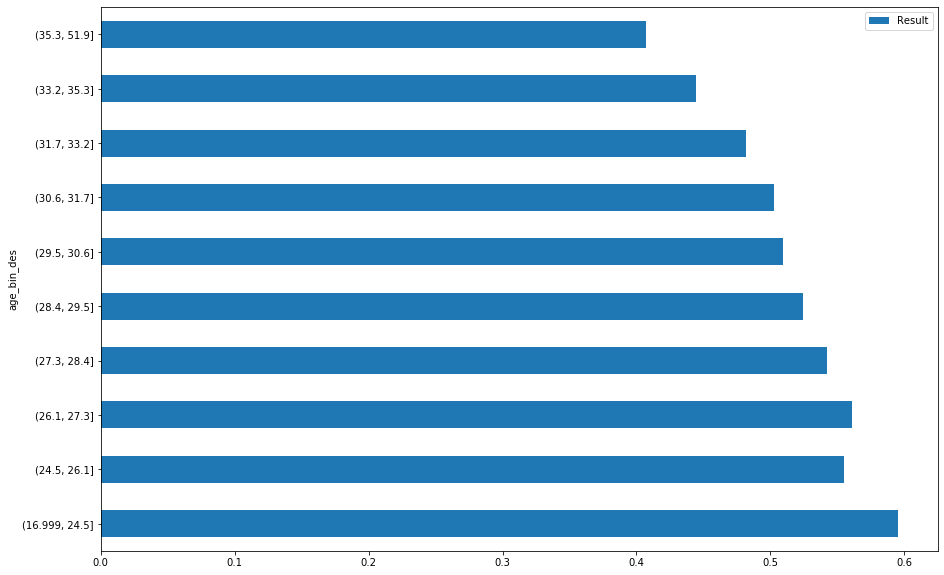

In [1514]:
pd.pivot_table(f,values = 'Result', index = 'age_bin_des', aggfunc = np.mean).plot(kind = 'barh',figsize=(15,10))

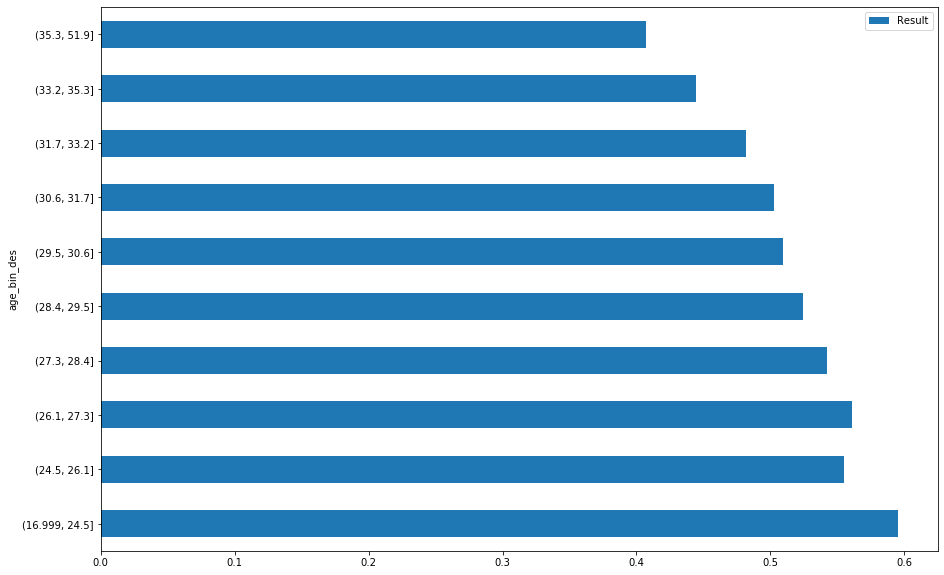

In [1524]:
pd.pivot_table(f,values = ['Result'], index = 'age_bin_des', aggfunc = np.mean).plot(kind = 'barh',figsize=(15,10))

In [1505]:
f[f.age_bins == 13]

,Result,Result_F,Event,Date,Method,Round,Time,Type,T_Format,Ref,Details,Fighter_,KD_,SigStr_e_,SigStr_t_,TotStr_e_,TotStr_t_,TD_e_,TD_t_,SUB_,PASS_,REV_,Head_e_,Head_t_,Body_e_,Body_t_,Leg_e_,Leg_t_,Distance_e_,Distance_t_,Clinch_e_,Clinch_t_,Ground_e_,Ground_t_,First_F,Last_F,Nick_F,Stance_F,W_F,L_F,D_F,DOB_F,FID_F,HT_cm_F,Reach_cm_F,WT_lbs_F,age_F,fight_time,delta_h,delta_w,delta_r,w2d_F,l2d_F,time_avg_F,slpm_avg_F,stracc_avg_F,sapm_avg_F,def_avg_F,td_avg_F,tdacc_avg_F,tddef_avg_F,sub_avg_F,lastfight_F,elo_F,eloprob_F,Head_perT_,Head_acc_,Body_perT_,Body_acc_,Leg_perT_,Leg_acc_,Distance_perT_,Distance_acc_,Clinch_perT_,Clinch_acc_,Ground_perT_,Ground_acc_,PASS_perT_,REV_perT_,KD_perT_,pca_0_F,pca_1_F,pca_2_F,pca_3_F,pca_4_F,age_bins,age_bin_des
MID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f0e299c134cbac37,0.0,NaN,UFC 129: St-Pierre vs Shields,2011-04-30,KO/TKO,2,1:05,LIGHT HEAVYWEIGHT BOUT,3 Rnd (5-5-5),Yves Lavigne,Kick to Head At Distance,Randy Couture,0.0,5.0,23.0,5.0,24.0,0.0,3.0,0.0,0.0,0.0,4.0,21.0,1.0,2.0,0.0,0.0,5.0,21.0,0.0,2.0,0.0,0.0,Randy,Couture,The Natural,Orthodox,19.0,11.0,0.0,1963-06-22,600.0,185.42,190.5,205.0,47.9,6.1,0.00,-20.0,-2.54,19.0,10.0,11.558333,2.784173,0.597222,1.388489,0.584499,2.913669,0.524272,0.59375,0.593525,8.1,84.246646,0.431302,10.701439,0.543379,1.546763,0.86,1.672662,0.920792,3.651079,0.404382,4.226619,0.770492,6.043165,0.687117,2.643885,0.107914,0.053957,10.590311,1.133308,5.546109,2.383511,-1.408408,13,"(47.247, 49.573]"
b28a6efb7197b786,1.0,W,Strikeforce - Diaz vs. Cyborg,2011-01-29,KO/TKO,1,3:13,HEAVYWEIGHT BOUT,3 Rnd (5-5-5),Dan Stell,Punch to Head In Clinch,Herschel Walker,2.0,20.0,26.0,47.0,66.0,1.0,1.0,0.0,0.0,0.0,14.0,20.0,1.0,1.0,5.0,5.0,2.0,5.0,0.0,0.0,18.0,21.0,Herschel,Walker,NaN,Orthodox,2.0,0.0,0.0,1962-03-03,3222.0,185.42,NaN,215.0,48.9,3.2,-2.54,0.0,NaN,1.0,0.0,12.300000,2.538462,0.622642,0.384615,0.500000,1.153846,1.000000,1.00000,0.000000,12.0,10.000000,0.514387,9.230769,0.571429,1.538462,1.00,1.923077,0.714286,2.692308,0.583333,0.384615,1.000000,9.615385,0.625000,8.076923,0.000000,0.000000,9.541925,5.634029,6.810329,-0.077250,2.930063,13,"(47.247, 49.573]"
a49006f9199a015b,1.0,W,Strikeforce - Miami,2010-01-30,KO/TKO,3,2:17,HEAVYWEIGHT BOUT,3 Rnd (5-5-5),Troy Waugh,Punches to Body On Ground,Herschel Walker,0.0,33.0,53.0,112.0,145.0,1.0,1.0,0.0,7.0,0.0,24.0,42.0,4.0,4.0,5.0,7.0,7.0,12.0,1.0,1.0,25.0,40.0,Herschel,Walker,NaN,Orthodox,2.0,0.0,0.0,1962-03-03,3222.0,185.42,NaN,215.0,47.9,12.3,0.00,5.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.365755,-2.252067,4.016959,0.219029,2.188322,13,"(47.247, 49.573]"


##### Save Data

In [1442]:
try: r.drop(['HT_F1','HT_F2','WT_F1','WT_F2','Reach_F1','Reach_F2'],axis=1,inplace=True)
except: pass
r.to_csv(f'D:/jasper/98_general_projects/03_UFC_Predictions/Data/{date}_features.csv')